## Outlier detection techniques
Outlier detection plays an important role in financial transaction. This tutorial guides you to tackle this problems.   
1. __Using K-Mean__


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, labels = make_blobs(100,centers=1)

In [3]:
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
# computing distances and identifying the five closest points 
distances = kmeans.transform(X)

In [5]:
# First return an array of indexes in ascending order with argsort, the reverse it by [::-1], finallly get top five with [:5]
sorted_idx = np.argsort(distances.ravel())[::-1][:5]


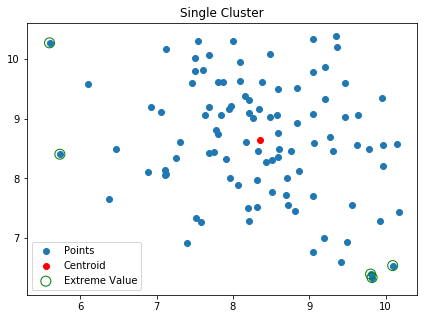

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
f,ax =plt.subplots(figsize=[7,5])
ax.set_title("Single Cluster")
ax.scatter(X[:,0],X[:,1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='Centroid',color='r')
ax.scatter(X[sorted_idx][:,0],X[sorted_idx][:,1],label='Extreme Value',edgecolors='g', facecolors='none',s=100)
ax.legend(loc='best')

In [10]:
# remove these points 
new_X =np.delete(X, sorted_idx, axis =0)

In [11]:
# update a new centroid due to removal extreme
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

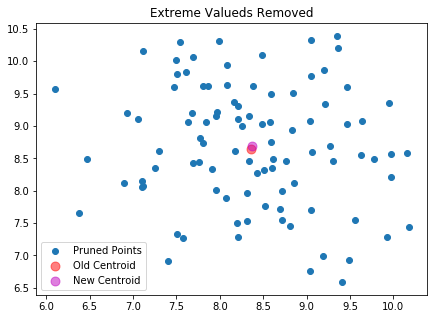

In [13]:
# Viaualize again new centroid against old centroid
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Extreme Valueds Removed")
ax.scatter(new_X[:,0], new_X[:,1],label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label='Old Centroid', color='r',s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:,0],new_kmeans.cluster_centers_[:,1],label='New Centroid', color='m',s=80, alpha=.5)
ax.legend(loc='best')

2.__Using one-class SVM__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from sklearn import svm

In [2]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations (outliers)
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [3]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


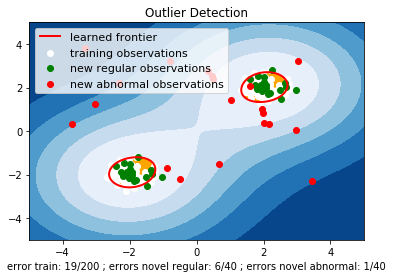

In [4]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Outlier Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()
